In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/exhibition_behavior_preprocessed.csv', delimiter=',', index_col=False)
df.head()

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance,time_ratio,code_score,engagement_score,norm_engagement_score,engagement_level
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.478873,3,3.521127,6.341146,mid
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.521127,4,3.521127,6.341146,mid
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.466216,3,3.533784,6.372981,mid
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.533784,4,3.533784,6.372981,mid
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",0.371981,3,3.628019,6.610002,mid


In [199]:
def indexing(df):
    # 'pid' column 초기값 설정
    pid = 0
    pid_list = []

    # 'behavior' column의 값이 '물리적거리'일 때마다 pid 값을 1씩 증가시킴
    for behavior in df['behavior']:
        if behavior == '물리적거리':
            pid_list.append(pid)
            pid += 1
        else:
            pid_list.append(pid_list[-1])

    # 'pid' column을 DataFrame에 추가
    df['pid'] = pid_list
    
    print(df.head(20))

In [200]:
indexing(df)

    uid  pid     date                 filename   start  duration    A/C  \
0     0    0  11월 19일  01_20221119085958_part2   56240      2720  Child   
1     0    0  11월 19일  01_20221119085958_part2   59360      2960  Child   
2     0    1  11월 19일  01_20221119085958_part2   71420      5520  Child   
3     0    1  11월 19일  01_20221119085958_part2   77400      6320  Child   
4     1    2  11월 19일  01_20221119085958_part2   48240      9240  Child   
5     1    2  11월 19일  01_20221119085958_part2   56640     15600  Child   
6     1    3  11월 19일  01_20221119085958_part2   71200      5920  Child   
7     1    3  11월 19일  01_20221119085958_part2   77400      6360  Child   
8     2    4  11월 19일  01_20221119085958_part2    3000     21040  Child   
9     2    5  11월 19일  01_20221119085958_part2  238160      4160  Child   
10    2    5  11월 19일  01_20221119085958_part2  242320      7760  Child   
11    3    6  11월 19일  01_20221119085958_part2  233440      6560  Child   
12    4    7  11월 19일  01

In [201]:
df = df.reindex(columns=['uid', 'pid', 'date', 'filename', 'start', 'duration', 'A/C', 'behavior', 'code', 'M/F', 'appearance'])

In [202]:
df

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화"
...,...,...,...,...,...,...,...,...,...,...,...
2682,371,1116,12월 4일,01_20221204165959_part1,2567280,17280,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지"
2683,371,1117,12월 4일,01_20221204165959_part1,2893760,14160,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지"
2684,372,1118,12월 4일,01_20221204165959_part1,2567280,18080,Adult,물리적거리,Pass,Male,"검은색 롱패딩, 검은색 바지"
2685,373,1119,12월 4일,01_20221204165959_part2,15760,13840,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지"


In [3]:
def cal_time_ratio(df):
    grouped = df.groupby('pid')
    total_duration = grouped['duration'].transform('sum')
    df['time_ratio'] = df['duration'] / total_duration
    return df

In [4]:
def code_score(df, scores):
    df['code_score'] = df['code'].map({ 'Pass': scores['Pass'], 'Approach': scores['Approach'], 'Follow': scores['Follow'], 'Avoid': scores['Avoid'],
                                        'None': scores['None'], 'Touch': scores['Touch'], 'Gesture': scores['Gesture']})
    return df

In [5]:
df = cal_time_ratio(df)

In [6]:
scores = {'Pass': 1, 'Follow': 2, 'Avoid': 2, 'Approach': 3, 
          'None': 4, 'Touch': 5, 'Gesture': 5}

In [7]:
df = code_score(df, scores)

In [8]:
df

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance,time_ratio,code_score,engagement_score,norm_engagement_score,engagement_level
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.478873,3,3.521127,6.341146,mid
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.521127,4,3.521127,6.341146,mid
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.466216,3,3.533784,6.372981,mid
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.533784,4,3.533784,6.372981,mid
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",0.371981,3,3.628019,6.610002,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,371,1116,12월 4일,01_20221204165959_part1,2567280,17280,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low
2683,371,1117,12월 4일,01_20221204165959_part1,2893760,14160,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low
2684,372,1118,12월 4일,01_20221204165959_part1,2567280,18080,Adult,물리적거리,Pass,Male,"검은색 롱패딩, 검은색 바지",1.000000,1,1.000000,0.000000,low
2685,373,1119,12월 4일,01_20221204165959_part2,15760,13840,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low


In [9]:
def cal_engagement_score(df):
    engagement_score = df.groupby('pid')['time_ratio', 'code_score'].apply(lambda x: (x['time_ratio'] * x['code_score']).sum())
    df['engagement_score'] = df['pid'].map(engagement_score)
    return df

In [10]:
def normalize(df, col, scale=10):
    min_score = df[col].min()
    max_score = df[col].max()
    df['norm_engagement_score'] = (df[col] - min_score) / (max_score - min_score) * scale
    return df

In [14]:
df = cal_engagement_score(df)
df = normalize(df, 'engagement_score', scale=100)

/var/folders/82/r8qf8qv90qb7n4hxx9nr72y80000gn/T/ipykernel_16866/3675448079.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  engagement_score = df.groupby('pid')['time_ratio', 'code_score'].apply(lambda x: (x['time_ratio'] * x['code_score']).sum())


In [15]:
df

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance,time_ratio,code_score,engagement_score,norm_engagement_score,engagement_level
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.478873,3,3.521127,63.411459,mid
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.521127,4,3.521127,63.411459,mid
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.466216,3,3.533784,63.729809,mid
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.533784,4,3.533784,63.729809,mid
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",0.371981,3,3.628019,66.100024,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,371,1116,12월 4일,01_20221204165959_part1,2567280,17280,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low
2683,371,1117,12월 4일,01_20221204165959_part1,2893760,14160,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low
2684,372,1118,12월 4일,01_20221204165959_part1,2567280,18080,Adult,물리적거리,Pass,Male,"검은색 롱패딩, 검은색 바지",1.000000,1,1.000000,0.000000,low
2685,373,1119,12월 4일,01_20221204165959_part2,15760,13840,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low


In [18]:
max(df['norm_engagement_score'])

100.0

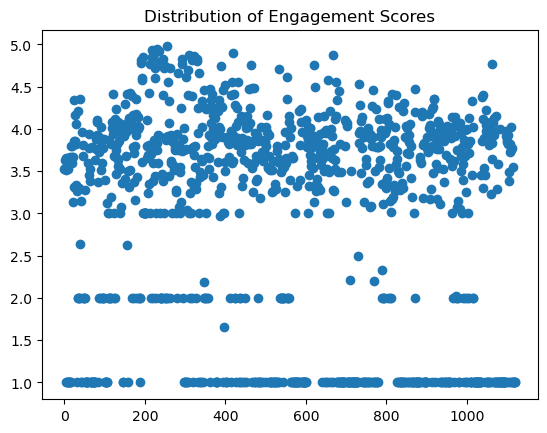

In [19]:
# 데이터프레임 생성
grouped_df = df.groupby('pid').max().reset_index()
 
# scatter plot 그리기
plt.scatter(x='pid', y='engagement_score', data=grouped_df)
plt.title('Distribution of Engagement Scores')
plt.show()

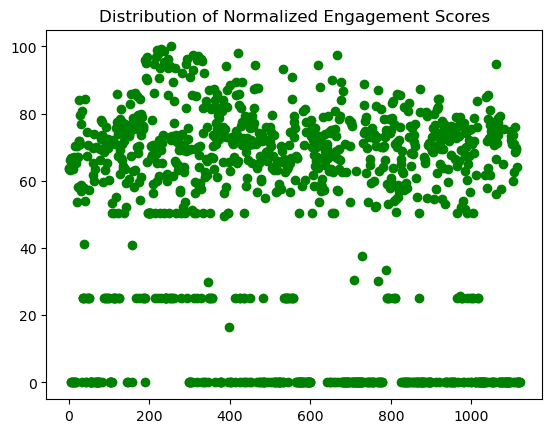

In [20]:
# 데이터프레임 생성
grouped_df = df.groupby('pid').max().reset_index()
 
# scatter plot 그리기
plt.scatter(x='pid', y='norm_engagement_score', data=grouped_df, color='green')
plt.title('Distribution of Normalized Engagement Scores')
plt.show()

In [25]:
def classify_engagement(df, threshold=50.0):
    level = []
    for score in df['norm_engagement_score']:
#         print(score)
        if score >= threshold:
            level.append('high')
        else:
            level.append('low')
    
    df['engagement_level'] = level
    return df

In [26]:
def draw_engagement_level(df):
    g =sns.scatterplot(x="pid", y="engagement_score",
                          hue="engagement_level",
                          data=df);
    g.set(xscale="pid");
    g.set(yscale="engagement_score");

In [29]:
df_50 = classify_engagement(df, threshold=50.0)

In [31]:
df_50

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance,time_ratio,code_score,engagement_score,norm_engagement_score,engagement_level
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.478873,3,3.521127,63.411459,high
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.521127,4,3.521127,63.411459,high
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.466216,3,3.533784,63.729809,high
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.533784,4,3.533784,63.729809,high
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",0.371981,3,3.628019,66.100024,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,371,1116,12월 4일,01_20221204165959_part1,2567280,17280,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low
2683,371,1117,12월 4일,01_20221204165959_part1,2893760,14160,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low
2684,372,1118,12월 4일,01_20221204165959_part1,2567280,18080,Adult,물리적거리,Pass,Male,"검은색 롱패딩, 검은색 바지",1.000000,1,1.000000,0.000000,low
2685,373,1119,12월 4일,01_20221204165959_part2,15760,13840,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1,1.000000,0.000000,low


ValueError: 'pid' is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

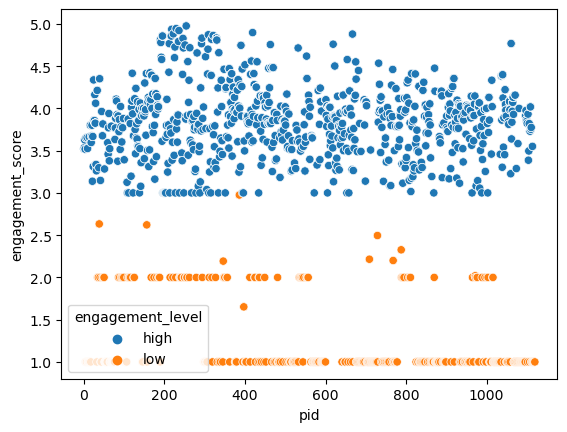

In [30]:
draw_engagement_level(df_50)

In [235]:
df.to_csv('./data/exhibition_behavior_preprocessed.csv', index=False)